# Building Data Visualization and Storytelling 

### Import Libraries

In [1]:
import pandas as pd
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

### Import Data

In [2]:
# https://dub.sh/ds-data-aggregate
data = pd.read_csv("https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_state.csv")
granular_data = pd.read_parquet("https://dub.sh/ds-data-granular")

In [3]:
# Load the GeoJSON file
gdf_states = gpd.read_file("C:\\Users\\PC\\OneDrive - Universiti Malaya\\Documents\\Github Project\\Blood-Donation-Automation\\GeoJSON Malaysia\\malaysia_singapore_brunei_State level 1.geojson")
data_x_m = data[data['state'] != 'Malaysia']
data_x_m['date'] = pd.to_datetime(data_x_m['date'])

C:\Users\PC\AppData\Local\Temp\ipykernel_11160\3893230587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x_m['date'] = pd.to_datetime(data_x_m['date'])


In [4]:
granular_data.tail()

,donor_id,visit_date,birth_date
6254932,00Ti4,2024-01-28,1984
6254933,002Pf,2024-01-28,1999
6254934,01Ngy,2024-01-28,1984
6254935,00UI9,2024-01-28,1968
6254936,02lpl,2024-01-28,1976


In [5]:
data.tail()

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
92423,2024-01-24,W.P. Kuala Lumpur,306,79,87,133,7,85,221,284,11,11,0,275,23,8,42,202,62
92424,2024-01-25,W.P. Kuala Lumpur,1521,334,475,687,25,114,1407,1496,10,15,0,1386,120,15,283,744,494
92425,2024-01-26,W.P. Kuala Lumpur,189,47,57,85,0,86,103,170,11,8,0,175,14,0,16,142,31
92426,2024-01-27,W.P. Kuala Lumpur,495,124,123,235,13,122,373,465,15,15,0,449,40,6,75,332,88
92427,2024-01-28,W.P. Kuala Lumpur,633,166,171,279,17,116,517,633,0,0,0,570,57,6,75,453,105


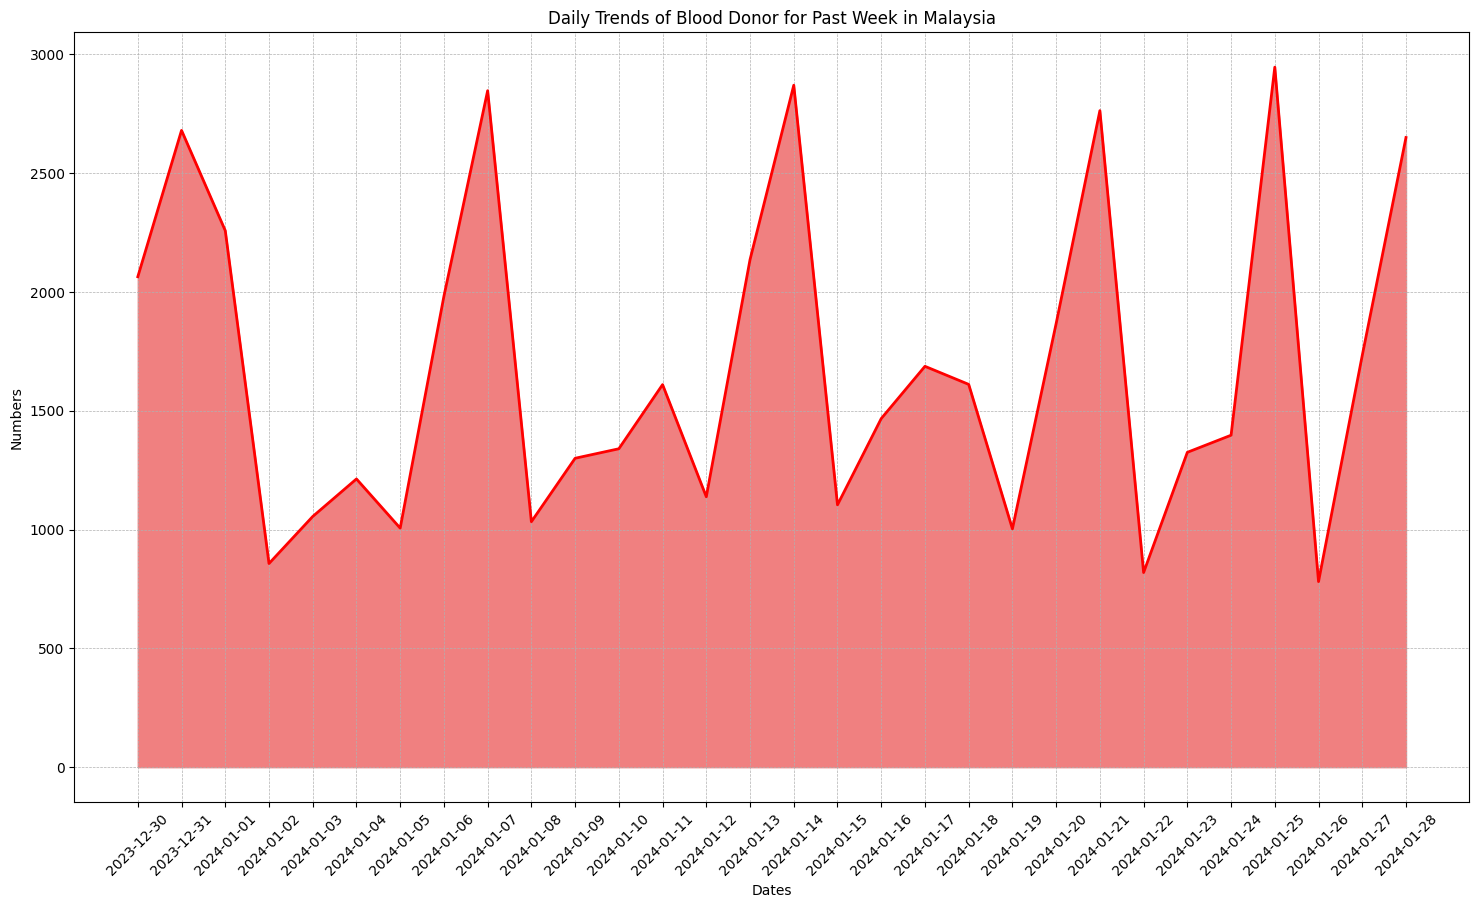

In [6]:
data_m = data[data['state']=='Malaysia']
data_m_subset_daily = data_m.tail(30)

plt.figure(figsize=(18, 10))
plt.plot(data_m_subset_daily['date'], data_m_subset_daily['daily'], color='red', linestyle='-', linewidth=2)
plt.fill_between(data_m_subset_daily['date'], data_m_subset_daily['daily'], color = 'lightcoral')
plt.title("Daily Trends of Blood Donor for Past Week in Malaysia")
plt.xticks(data_m_subset_daily['date'], rotation = 45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel("Dates")
plt.ylabel("Numbers")

# save plot
plt.savefig("C:\\Users\\PC\\OneDrive - Universiti Malaya\\Documents\\Github Project\\Blood-Donation-Automation\\Visualization\\daily_trends_of_blood_donor_for_past_week.png")

plt.show()

In [7]:
# Change 'date' datatype to datetime
data_m_subset_daily['date'] = pd.to_datetime(data_m_subset_daily['date'])

# Extract the day of the week
data_m_subset_daily['day_of_week'] = data_m_subset_daily['date'].dt.day_name()

# Group by day of the week and calculate the mean value for each day
daily_summary = data_m_subset_daily.groupby('day_of_week')['daily'].mean()

# Create a DataFrame from the daily summary
daily_summary_df = pd.DataFrame({
    'Day of the Week': daily_summary.index,
    'Mean Daily Value': daily_summary.values
})
day_highest_value = daily_summary.idxmax()
highest_value_daily = daily_summary.max()
day_lowest_value = daily_summary.idxmin()
lowest_value_daily = daily_summary.min()
# Display the result
print("Day with the highest value:", day_highest_value)
print("Highest Value:", highest_value_daily)
print("Day with the lowest value:", day_lowest_value)
print("Lowest Value:", lowest_value_daily)
print("\nDaily summary DataFrame:")
print(daily_summary_df)

Day with the highest value: Sunday
Highest Value: 2762.0
Day with the lowest value: Friday
Lowest Value: 982.0

Daily summary DataFrame:
  Day of the Week  Mean Daily Value
0          Friday            982.00
1          Monday           1303.50
2        Saturday           1956.40
3          Sunday           2762.00
4        Thursday           1845.00
5         Tuesday           1237.25
6       Wednesday           1369.75


C:\Users\PC\AppData\Local\Temp\ipykernel_11160\1535217676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_subset_daily['date'] = pd.to_datetime(data_m_subset_daily['date'])
C:\Users\PC\AppData\Local\Temp\ipykernel_11160\1535217676.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m_subset_daily['day_of_week'] = data_m_subset_daily['date'].dt.day_name()


C:\Users\PC\AppData\Local\Temp\ipykernel_11160\937626392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m['date'] = pd.to_datetime(data_m['date'])


Overall Trend Interpretation: Overall decreasing trend.


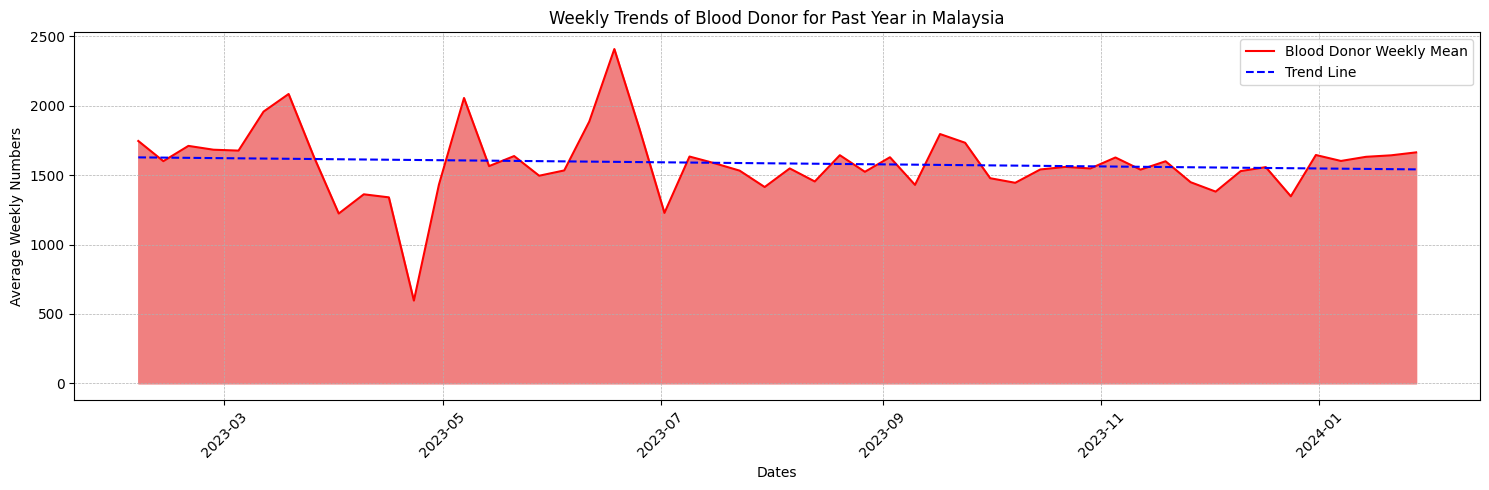

In [8]:
data_m['date'] = pd.to_datetime(data_m['date'])
data_m = data_m.set_index(['date'])
# Identify numeric columns excluding 'object' columns
numeric_columns = data_m.select_dtypes(exclude='object').columns

# Resample data and calculate monthly mean
data_weekly = data_m[numeric_columns].resample('W').mean().reset_index()

# Extract date and value columns
dates = data_weekly['date'].tail(52)
values = data_weekly['daily'].tail(52)
# Assuming 'dates' and 'values' are your data
X = np.arange(len(dates)).reshape(-1, 1)
y = values.values.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the trend line
trend_line = model.predict(X)
trend_slope = model.coef_[0][0]
# Interpretation based on trend slope
if trend_slope > 0:
    trend_interpretation = "Overall increasing trend."
elif trend_slope < 0:
    trend_interpretation = "Overall decreasing trend."
else:
    trend_interpretation = "No significant overall trend."

# Display interpretations
print("Overall Trend Interpretation:", trend_interpretation)

# Plot the original data and trend line
plt.figure(figsize=(15, 5))
plt.plot(dates, values, linestyle='-', color='red', label='Blood Donor Weekly Mean')
plt.plot(dates, trend_line, linestyle='--', color='blue', label='Trend Line')
plt.fill_between(dates, values, color = 'lightcoral')
plt.title("Weekly Trends of Blood Donor for Past Year in Malaysia")
plt.xlabel("Dates")
plt.ylabel("Average Weekly Numbers")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
# Save plot
plt.savefig("C:\\Users\\PC\\OneDrive - Universiti Malaya\\Documents\\Github Project\\Blood-Donation-Automation\\Visualization\\weekly_trends_of_blood_donor_for_past_year.png")
plt.show()


In [33]:
highest_donor_weekly_index = data_weekly['date'].tail(52).idxmax()
highest_donor_weekly_value =  data_weekly['daily'].tail(52).max()
date_highest_donor_weekly = data_weekly.loc[highest_donor_weekly_index, 'date'].week
str(date_highest_donor_weekly)
lowest_donor_weekly_index = data_weekly['daily'].tail(52).idxmin()
lowest_donor_weekly_value =  data_weekly['daily'].tail(52).min()
date_lowest_donor_weekly = data_weekly.loc[lowest_donor_weekly_index, 'date'].week
str(date_lowest_donor_weekly)

'16'

Overall Trend Interpretation: Overall increasing trend.


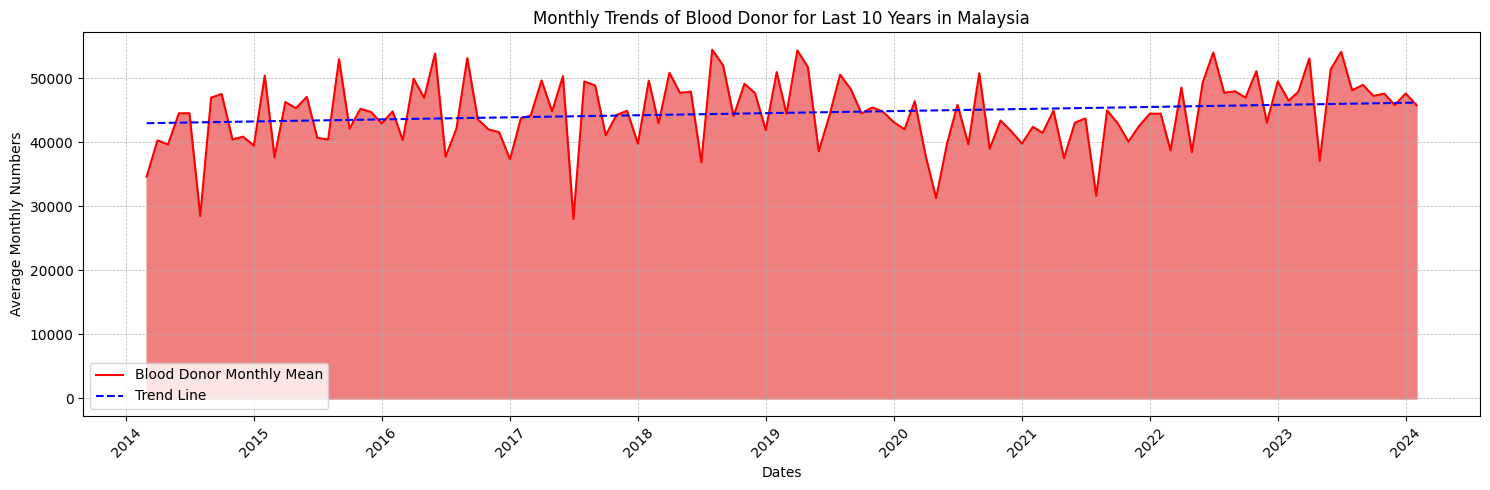

In [10]:
# Identify numeric columns excluding 'object' columns
numeric_columns = data_m.select_dtypes(exclude='object').columns

# Resample data and calculate monthly mean
data_monthly = data_m[numeric_columns].resample('M').sum().reset_index()

data_monthly_subset = data_monthly.tail(120)

# Extract date and value columns
dates = data_monthly_subset['date']
values = data_monthly_subset['daily']
# Assuming 'dates' and 'values' are your data
X = np.arange(len(dates)).reshape(-1, 1)
y = values.values.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the trend line
trend_line = model.predict(X)
trend_slope = model.coef_[0][0]
# Interpretation based on trend slope
if trend_slope > 0:
    trend_interpretation = "Overall increasing trend."
elif trend_slope < 0:
    trend_interpretation = "Overall decreasing trend."
else:
    trend_interpretation = "No significant overall trend."

# Display interpretations
print("Overall Trend Interpretation:", trend_interpretation)

# Create the plot with Matplotlib
plt.figure(figsize=(15, 5))
plt.plot(dates, values, linestyle='-', color='red', label='Blood Donor Monthly Mean')
plt.plot(dates, trend_line, linestyle='--', color='blue', label='Trend Line')
plt.fill_between(dates, values, color = 'lightcoral')
# Customize plot
plt.title("Monthly Trends of Blood Donor for Last 10 Years in Malaysia")
plt.xlabel("Dates")
plt.ylabel("Average Monthly Numbers")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# save plot
plt.savefig("C:\\Users\\PC\\OneDrive - Universiti Malaya\\Documents\\Github Project\\Blood-Donation-Automation\\Visualization\\monthly_trends_of_blood_donor_for_10_years.png")

# Display plot
plt.show()

In [11]:
# Change datatype to datetime
data_monthly_subset['date'] = pd.to_datetime(data_monthly_subset['date'])

# Extract the month name
data_monthly_subset['Month'] = data_monthly_subset['date'].dt.month_name()

# Group by day of the week and calculate the mean value for each month
monthly_summary = data_monthly_subset.groupby('Month')['daily'].mean()

# Create a DataFrame from the daily summary
monthly_summary_df = pd.DataFrame({
    'Month': monthly_summary.index,
    'Mean Monthly Value': monthly_summary.round(2)
})
montly_highest_value = monthly_summary.idxmax()
highest_value_monthly = round(monthly_summary.max(),2)
monthly_lowest_value = monthly_summary.idxmin()
lowest_value_monthly = round(monthly_summary.min(), 2)
# Display the result
print("Month with the highest value:", montly_highest_value)
print("Highest Value:", highest_value_monthly)
print("Month with the lowest value:", monthly_lowest_value)
print("Lowest Value:", lowest_value_monthly)
print("\nMonthly summary DataFrame:")
print(monthly_summary_df)

Month with the highest value: August
Highest Value: 49484.5
Month with the lowest value: February
Lowest Value: 41865.9

Monthly summary DataFrame:
               Month  Mean Monthly Value
Month                                   
April          April             42049.3
August        August             49484.5
December    December             42591.3
February    February             41865.9
January      January             46072.1
July            July             43264.2
June            June             42955.8
March          March             47580.0
May              May             46578.5
November    November             43772.8
October      October             44867.3
September  September             43908.6


C:\Users\PC\AppData\Local\Temp\ipykernel_11160\3654677264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_monthly_subset['date'] = pd.to_datetime(data_monthly_subset['date'])
C:\Users\PC\AppData\Local\Temp\ipykernel_11160\3654677264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_monthly_subset['Month'] = data_monthly_subset['date'].dt.month_name()


In [12]:
highest_donor_monthly_index = data_monthly['date'].tail(120).idxmax()
date_highest_donor_monthly = data_monthly.loc[highest_donor_monthly_index, 'date'].date()
str(date_highest_donor_monthly)
lowest_donor_monthly_index = data_monthly['date'].tail(120).idxmin()
date_lowest_donor_monthly = data_monthly.loc[lowest_donor_monthly_index, 'date'].date()
str(date_lowest_donor_monthly)

'2014-02-28'

Overall Trend Interpretation: Overall increasing trend.


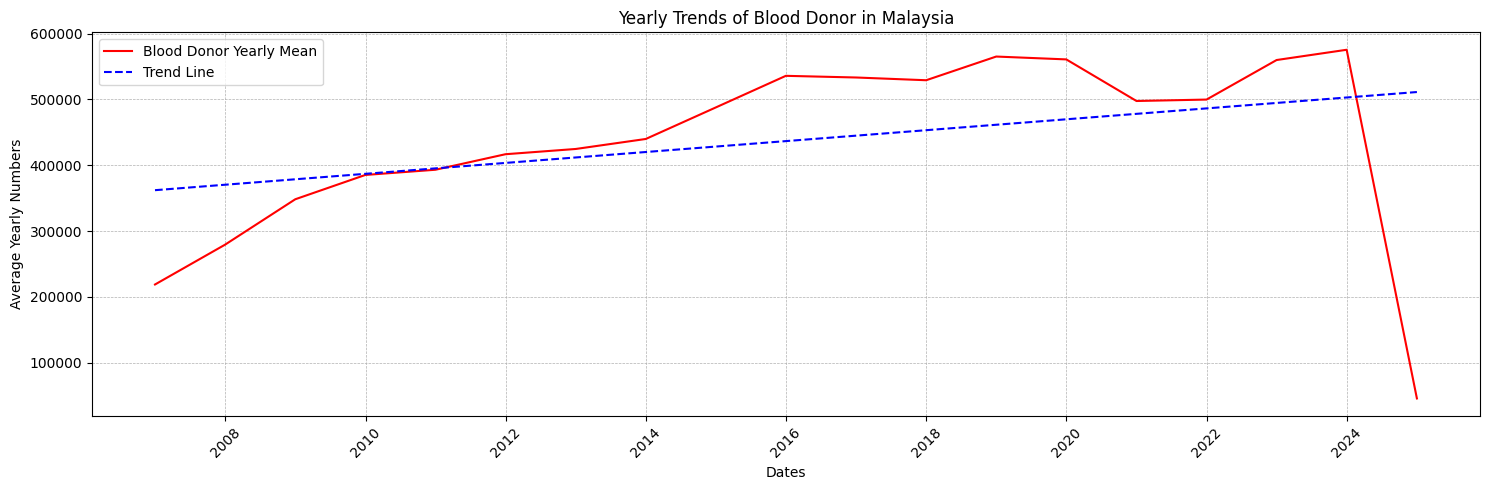

In [13]:
# Identify numeric columns excluding 'object' columns
numeric_columns = data_m.select_dtypes(exclude='object').columns

# Resample data and calculate monthly mean
data_yearly = data_m[numeric_columns].resample('Y').sum().reset_index()

# Extract date and value columns
dates = data_yearly['date']
values = data_yearly['daily']  # Assuming 'daily' is your value column
# Assuming 'dates' and 'values' are your data
X = np.arange(len(dates)).reshape(-1, 1)
y = values.values.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the trend line
trend_line = model.predict(X)
trend_slope = model.coef_[0][0]
# Interpretation based on trend slope
if trend_slope > 0:
    trend_interpretation = "Overall increasing trend."
elif trend_slope < 0:
    trend_interpretation = "Overall decreasing trend."
else:
    trend_interpretation = "No significant overall trend."

# Display interpretations
print("Overall Trend Interpretation:", trend_interpretation)

# Create the plot with Matplotlib
plt.figure(figsize=(15, 5))
plt.plot(dates, values, linestyle='-', color='red', label='Blood Donor Yearly Mean')
plt.plot(dates, trend_line, linestyle='--', color='blue', label='Trend Line')
# Customize plot
plt.title("Yearly Trends of Blood Donor in Malaysia")
plt.xlabel("Dates")
plt.ylabel("Average Yearly Numbers")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# save plot
plt.savefig("C:\\Users\\PC\\OneDrive - Universiti Malaya\\Documents\\Github Project\\Blood-Donation-Automation\\Visualization\\yearly_trends_of_blood_donor.png")

# Display plot
plt.show()

In [14]:
current_year = datetime.today().year
data_2023 = data_x_m[data_x_m['date'].dt.year == current_year-1]
annual_totals = data_2023.groupby('state')['daily'].sum()
print(annual_totals)
nation_total = data_2023['daily'].sum()
print(nation_total)
percentage_contributions = (annual_totals / nation_total) * 100
percentage_contributions = percentage_contributions.round(2)  # Round to 2 decimal places
data_percentage_contribution = pd.DataFrame(percentage_contributions)
data_percentage_contribution=data_percentage_contribution.reset_index()

state
Johor                 43706
Kedah                 21564
Kelantan              16716
Melaka                28445
Negeri Sembilan       16417
Pahang                22803
Perak                 46920
Pulau Pinang          41633
Sabah                 39826
Sarawak               41593
Selangor              30132
Terengganu            19360
W.P. Kuala Lumpur    206288
Name: daily, dtype: int64
575403


In [15]:
data_percentage_contribution.loc[data_percentage_contribution['state'] == 'Melaka', 'state'] = 'Malacca'
data_percentage_contribution.loc[data_percentage_contribution['state'] == 'W.P. Kuala Lumpur', 'state'] = 'Kuala Lumpur'
data_percentage_contribution.loc[data_percentage_contribution['state'] == 'Pulau Pinang', 'state'] = 'Penang'

In [16]:
# Check if "Perlis" is in the 'state' column
if 'Perlis' not in data_percentage_contribution['state'].values:
    # Adding a new row for Perlis
    new_row = pd.DataFrame({'state': 'Perlis', 'daily': 0.0}, index=[0])
    data_percentage_contribution = pd.concat([data_percentage_contribution, new_row], axis=0, ignore_index=True)

In [17]:
data_percentage_contribution

,state,daily
0,Johor,7.60
1,Kedah,3.75
2,Kelantan,2.91
3,Malacca,4.94
4,Negeri Sembilan,2.85
5,Pahang,3.96
6,Perak,8.15
7,Penang,7.24
8,Sabah,6.92
9,Sarawak,7.23


C:\Users\PC\AppData\Local\Temp\ipykernel_11160\3424260396.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['shapename']):


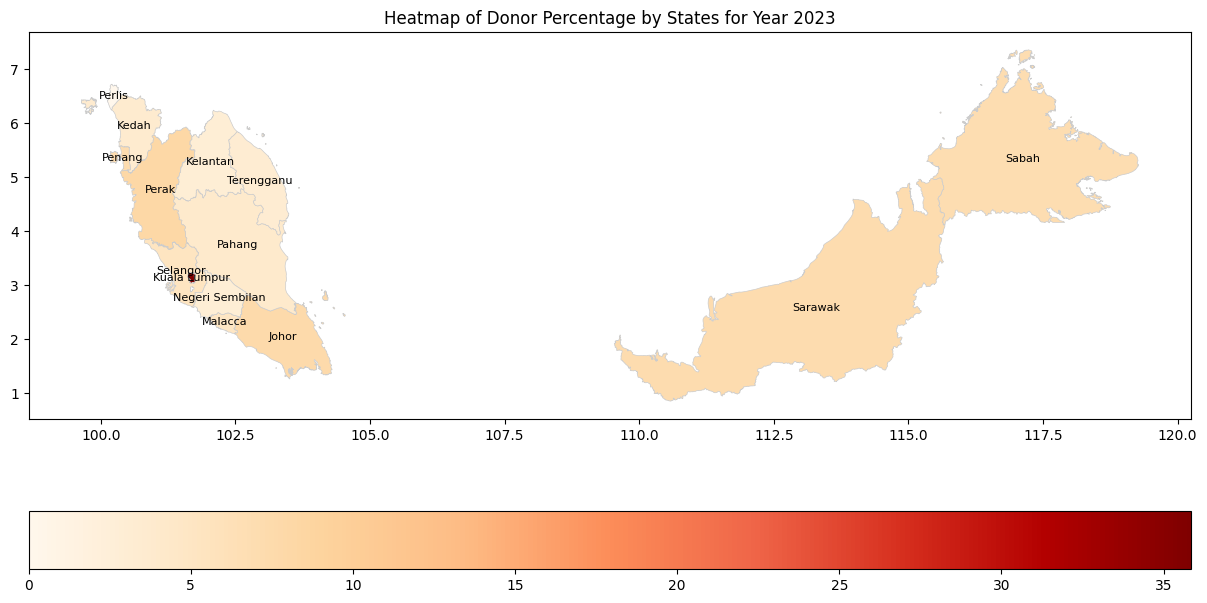

In [18]:
gdf_states = gdf_states[~(gdf_states['shapegroup'] == "BRN")]
# Merge the GeoPandas DataFrame with the DataFrame containing your data
merged_data = gdf_states.merge(data_percentage_contribution, left_on='shapename', right_on='state')
# set the range for the choropleth
vmin, vmax = data_percentage_contribution['daily'].min(), data_percentage_contribution['daily'].max()
# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.set_title('Heatmap of Donor Percentage by States for Year 2023')

# Plot the choropleth map
merged_data.plot(column='daily', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.8')

# Add labels for states
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['shapename']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add the colorbar to the figure
cbar = fig.colorbar(sm, ax=ax, location = 'bottom')
# Display the map
plt.show()
#saving our map as .png file.
fig.savefig('C:\\Users\\PC\\OneDrive - Universiti Malaya\\Documents\\Github Project\\Blood-Donation-Automation\\Visualization\\map_donor_percentage_by_state.png')

In [19]:
data_percentage_contribution

,state,daily
0,Johor,7.60
1,Kedah,3.75
2,Kelantan,2.91
3,Malacca,4.94
4,Negeri Sembilan,2.85
5,Pahang,3.96
6,Perak,8.15
7,Penang,7.24
8,Sabah,6.92
9,Sarawak,7.23


In [20]:
#  calculate the highest percentage
highestState_percentage = data_percentage_contribution['daily'].idxmax()
highest_percentage = data_percentage_contribution['daily'].max()
state_name_highest = data_percentage_contribution.loc[highestState_percentage, 'state']

In [21]:
non_unique_ids = granular_data.loc[granular_data["donor_id"].duplicated()]
non_unique_ids

,donor_id,visit_date,birth_date
1,00000,2014-05-26,1964
2,00000,2015-01-25,1964
3,00000,2015-08-09,1964
4,00000,2016-03-10,1964
5,00000,2016-08-14,1964
...,...,...,...
6254932,00Ti4,2024-01-28,1984
6254933,002Pf,2024-01-28,1999
6254934,01Ngy,2024-01-28,1984
6254935,00UI9,2024-01-28,1968


In [22]:
non_unique_count = len(non_unique_ids)
non_unique_count

4008044

In [23]:
unique_ids_df = granular_data[~granular_data["donor_id"].isin(non_unique_ids["donor_id"])]
unique_ids_df

,donor_id,visit_date,birth_date
192,0000r,2019-07-24,1973
330,0000L,2019-08-24,1989
346,0000R,2012-01-08,1967
429,00014,2014-09-06,1993
499,0001h,2021-11-21,1962
...,...,...,...
6254879,09qw8,2024-01-28,1995
6254883,09qw9,2024-01-28,2001
6254890,09qwa,2024-01-28,1981
6254916,09qwb,2024-01-28,1977


In [24]:
all_donor = int(granular_data['donor_id'].nunique())
returning_donor_count = int(non_unique_ids['donor_id'].nunique())
non_returning_donor_count = int(len(unique_ids_df))

In [25]:
percentage_return = (returning_donor_count / all_donor * 100)
formatted_percentage = f"{percentage_return:.2f}"  # Format as string
print(formatted_percentage+"%")

47.94%


In [26]:
percentage_not_return = non_returning_donor_count/all_donor * 100
formatted_percentage_non_return = f"{percentage_not_return:.2f}"
print(formatted_percentage_non_return+"%")

52.06%


In [27]:
unique_ids_df['visit_date'] = pd.to_datetime(unique_ids_df['visit_date'])
unique_ids_df['Age'] = unique_ids_df['visit_date'].dt.year - unique_ids_df['birth_date']

C:\Users\PC\AppData\Local\Temp\ipykernel_11160\1001573455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_ids_df['visit_date'] = pd.to_datetime(unique_ids_df['visit_date'])
C:\Users\PC\AppData\Local\Temp\ipykernel_11160\1001573455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_ids_df['Age'] = unique_ids_df['visit_date'].dt.year - unique_ids_df['birth_date']


In [28]:
distinct_donor_data = non_unique_ids.drop_duplicates(subset='donor_id', keep='last')
num_people_coming_more_than_once = int(len(distinct_donor_data))
print("Number of people coming more than once:", num_people_coming_more_than_once)

Number of people coming more than once: 1077132


In [30]:
distinct_donor_data['visit_date'] = pd.to_datetime(distinct_donor_data['visit_date'])
distinct_donor_data['Age'] = distinct_donor_data['visit_date'].dt.year - distinct_donor_data['birth_date']

C:\Users\PC\AppData\Local\Temp\ipykernel_11160\374387549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distinct_donor_data['visit_date'] = pd.to_datetime(distinct_donor_data['visit_date'])
C:\Users\PC\AppData\Local\Temp\ipykernel_11160\374387549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distinct_donor_data['Age'] = distinct_donor_data['visit_date'].dt.year - distinct_donor_data['birth_date']


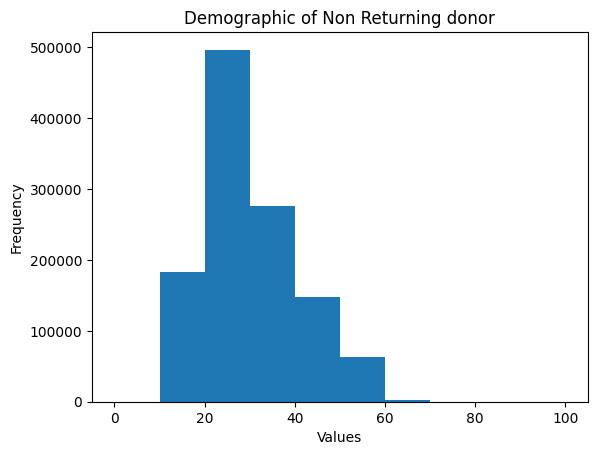

In [31]:
# bin_edges = range(0, 110, 10)
# # Create the histogram
# plt.hist(unique_ids_df['Age'], bins=bin_edges)  # Adjust bins as needed

# # Customize the plot
# plt.title("Demographic of Non Returning donor")
# plt.xlabel("Values")
# plt.ylabel("Frequency")
# plt.grid(False)  # Show grid on both axes

# # Save the histogram as a PNG image
# plt.savefig("age_demographic_of_non_returning_donor.png")

# # Display the histogram
# plt.show()

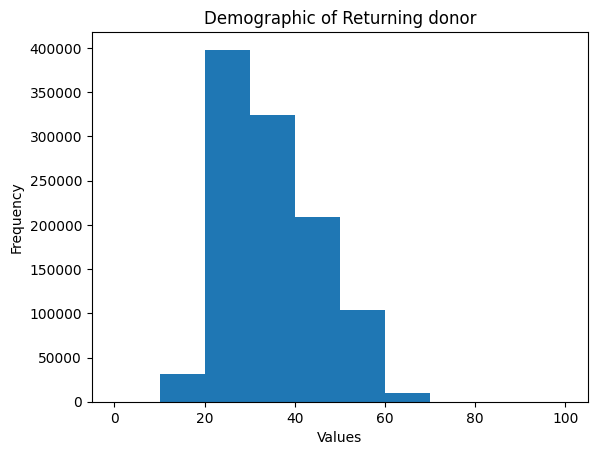

In [32]:
bin_edges = range(0, 110, 10)
# Create the histogram
plt.hist(distinct_donor_data['Age'], bins=bin_edges)  # Adjust bins as needed

# Customize the plot
plt.title("Demographic of Returning donor")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(False)  # Show grid on both axes

# Save the histogram as a PNG image
plt.savefig("age_demographic_of_returning_donor.png")

# Display the histogram
plt.show()

In [ ]:
# Create bin edges with a bin width of 10
bin_edges = range(0, 110, 10)  # Adjust the range as needed

# Calculate the histogram using NumPy
counts, bins = np.histogram(distinct_donor_data['Age'], bins=bin_edges)

# Print the bin edges and frequencies
print("Bin Edges:", bins)
print("Frequencies:", counts)

# Optionally, create a DataFrame for further analysis
histogram_data = pd.DataFrame({"bin_edges": bins[:-1], "frequency": counts})
histogram_data

Bin Edges: [  0  10  20  30  40  50  60  70  80  90 100]
Frequencies: [     8  31542 398061 324451 209127 103894   9940     25      2      4]


,bin_edges,frequency
0,0,8
1,10,31542
2,20,398061
3,30,324451
4,40,209127
5,50,103894
6,60,9940
7,70,25
8,80,2
9,90,4


In [ ]:
# Find the index of the maximum frequency
max_frequency_index = histogram_data['frequency'].idxmax()

# Retrieve the corresponding bin edge
max_bin_edge = histogram_data.loc[max_frequency_index, 'bin_edges']

print(f"Highest Frequency: {histogram_data['frequency'].max()}")
print(f"Corresponding Bin Edge: {max_bin_edge}")

Highest Frequency: 398061
Corresponding Bin Edge: 20
